In [2]:
from parameter_initialization_deep_rl.common.helpers import plot_performance
import numpy as np
from matplotlib import pyplot as plt

standard
Performance at timestep 0: -479.86035184499997
Best Performance: 90.868331065
Average Performance: -14.232338054634148
bc_naive
Performance at timestep 0: -249.41104802499996
Best Performance: 111.62073723
Average Performance: -10.348671526463415
bc_expert
Performance at timestep 0: -54.03145788249999
Best Performance: 113.59484984000001
Average Performance: 1.463938048841466


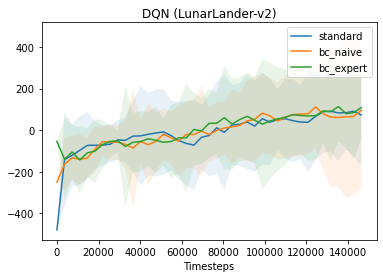

In [5]:
algo = "DQN"
modes = ["standard", "bc_naive", "bc_expert"]
plt.figure()
for mode in modes:
    log_dir = f"./logs/{algo}/{mode}/avg_perf_eval_trials.npz"
    perf = np.load(log_dir)
    avg = perf["avg"]
    h = perf["h"]
    h = np.insert(h, 0, 0., axis=0)
    # Performance scores
    zero_perf = avg[0]
    best_perf = np.max(avg, axis=0)
    avg_perf = np.mean(avg, axis=0)
    print(mode)
    print(f"Performance at timestep 0: {zero_perf}")
    print(f"Best Performance: {best_perf}")
    print(f"Average Performance: {avg_perf}")
    num_timesteps = 1.5e5
    stepsize = num_timesteps / len(avg)
    x = np.arange(0,num_timesteps,stepsize)
    plt.plot(x,avg,label=mode)
    plt.fill_between(x, avg-h, avg+h, alpha=.1)
plt.xlabel("Timesteps")
plt.title(f"{algo} (LunarLander-v2)")
plt.legend()
plt.savefig(f"./logs/{algo}/{algo.lower()}_pretraining_confidence")
plt.show()